In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

import warnings
warnings.filterwarnings('ignore')

**Data Preprocessing**

In [2]:
AAPL = pd.read_csv("../../Stock-Price-Prediction/data/dataset/AAPL_train.csv")
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450962,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126770,164101200


In [3]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1278 non-null   object 
 1   Open       1278 non-null   float64
 2   High       1278 non-null   float64
 3   Low        1278 non-null   float64
 4   Close      1278 non-null   float64
 5   Adj Close  1278 non-null   float64
 6   Volume     1278 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 70.0+ KB


In [4]:
# Drop NULL rows
AAPL.dropna(inplace = True)

In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03
mean,123.918476,125.333799,122.611307,124.046099,122.450400,1.008862e+08
std,46.845427,47.260482,46.430558,46.862066,47.117668,5.251626e+07
min,35.994999,36.430000,35.500000,35.547501,34.075394,2.404830e+07
25%,77.981251,79.021877,77.151251,77.839375,75.881258,6.759442e+07
50%,135.535004,137.065002,133.750000,135.310005,133.894775,8.797825e+07
75%,161.202499,163.620003,159.395004,161.592495,159.918930,1.183752e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08


In [6]:
AAPL["Date"] = pd.to_datetime(AAPL["Date"])
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845032,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450962,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126770,164101200


**Exploratory Data Analysis**

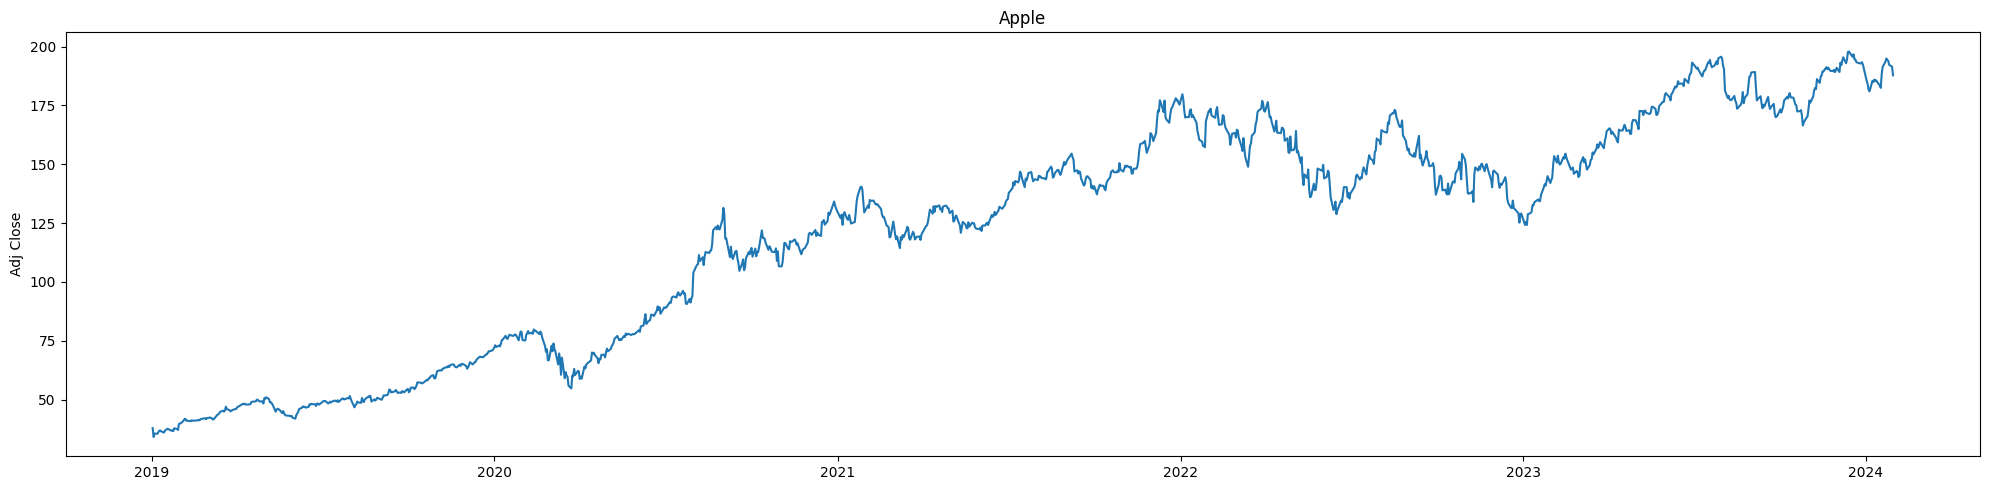

In [7]:
# Historical view of the closing prices
plot_historical_closing_prices(company=AAPL, title='Apple')

- Apple's stock price has been on a general upward trend during this period. The share price has risen from about $50 in 2019 to about $200 in 2024.
- However, the share price also fluctuates significantly in the short term. 
    - For example, the COVID-19 pandemic has had a significant impact on Apple's stock price. The stock price plummeted in early 2020 at the onset of the pandemic. However, the stock price recovered strongly after that as Apple benefited from an increase in demand for the products. 
    - The Russia-Ukraine war has caused uncertainty in global financial markets, and Apple's stock price is no exception. The share price has fallen slightly in March 2024 on concerns about the impact of the war.

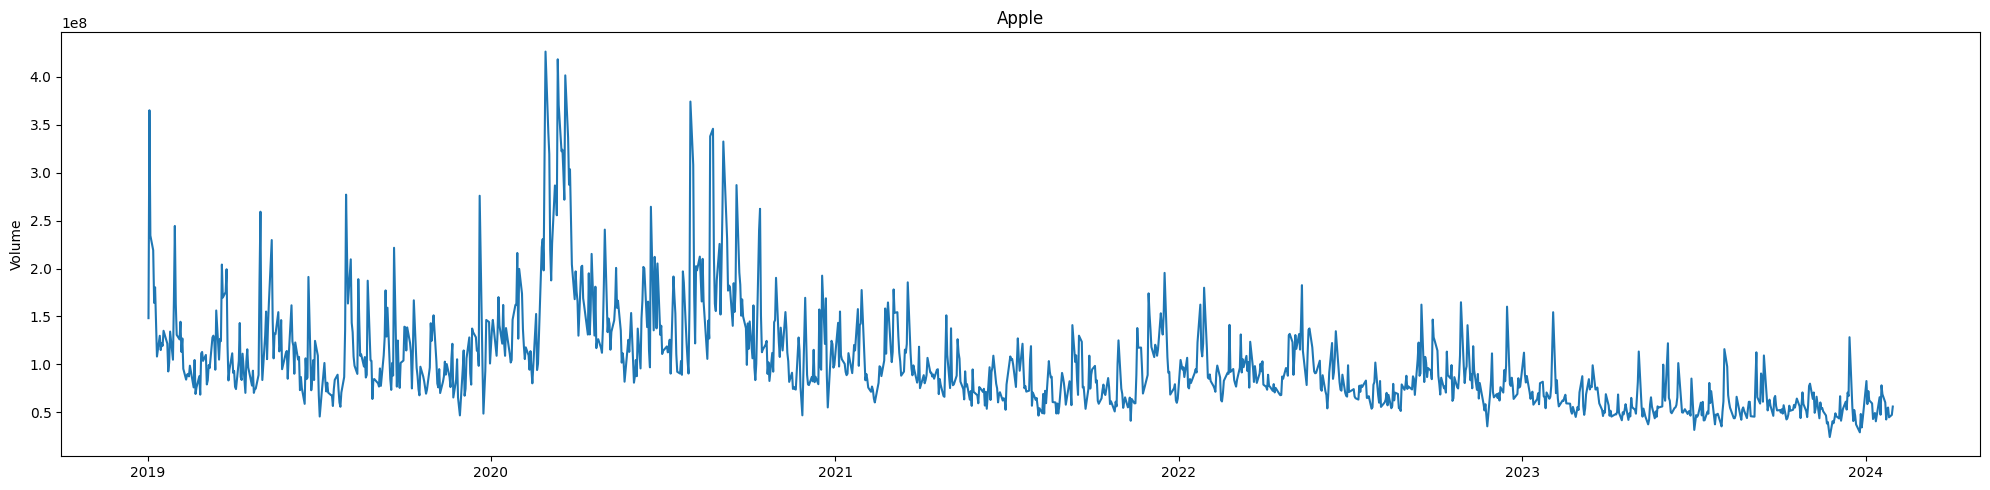

In [8]:
# Total volume of stock being traded each day
plot_total_volume_traded(company=AAPL, title='Apple')

What was the moving average of the stock?

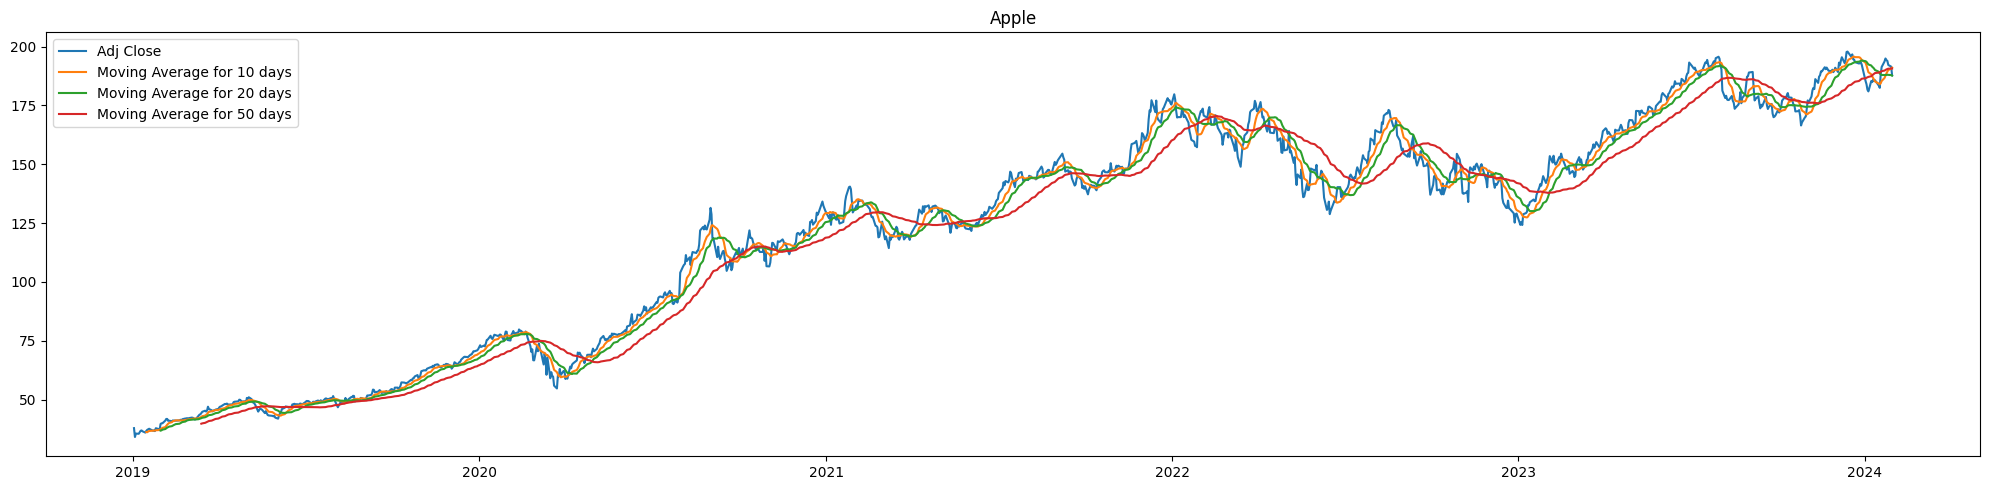

In [9]:
plot_moving_averages(company=AAPL, title='Apple', moving_averages=[10, 20, 50])

- The 10-day moving average is below the 20-day and 50-day moving averages. This shows that the short-term trend of Apple shares is bearish. 
- However, the 20-day and 50-day moving averages are trending upward, which indicates that the long-term trend of Apple shares is bullish

What was the daily return of the stock on average?

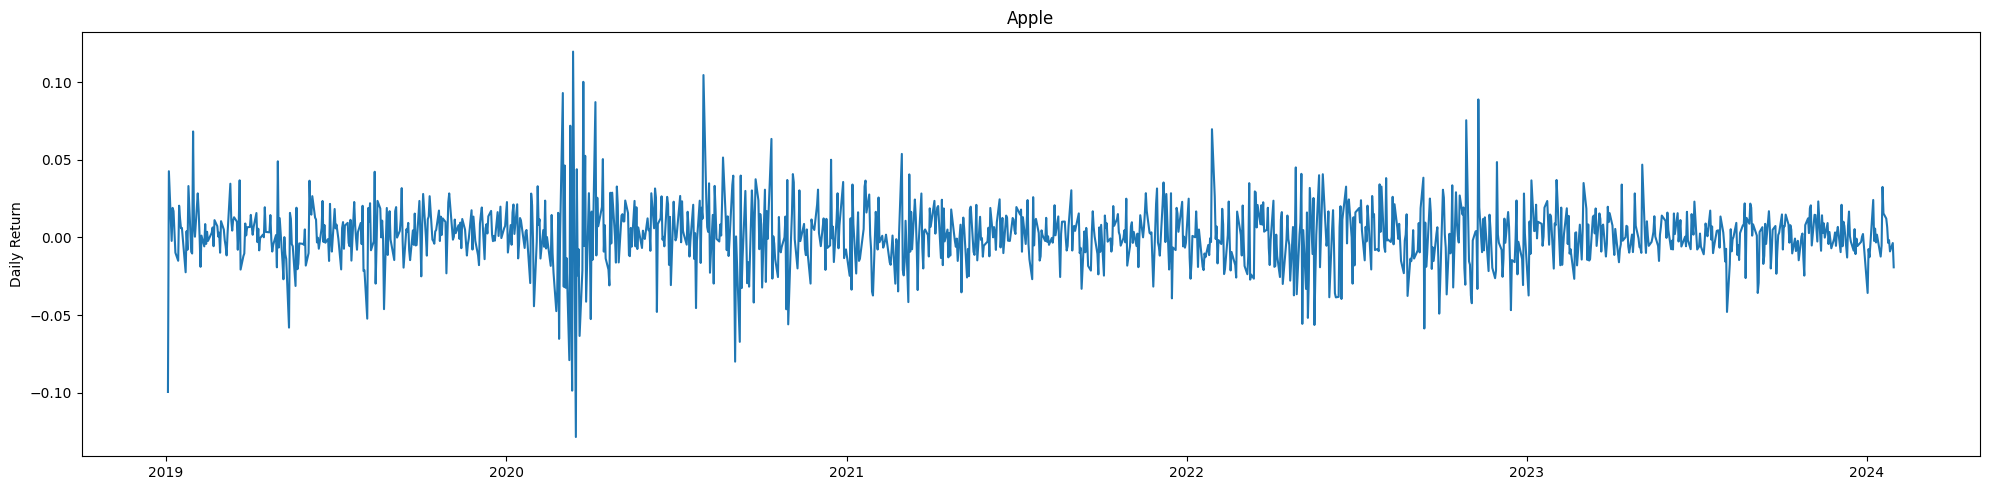

In [10]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()
plot_daily_returns(company=AAPL, title='Apple')

- The daily rate of return on Apple shares during this period ranged from -0.10 to 0.10. This suggests that the share price may fluctuate slightly in the short term. 
- The daily rate of return is concentrated mainly at 0.00, with 34 days having a rate of return equal to 0.00. This shows that Apple's stock price tends to stabilize during the period

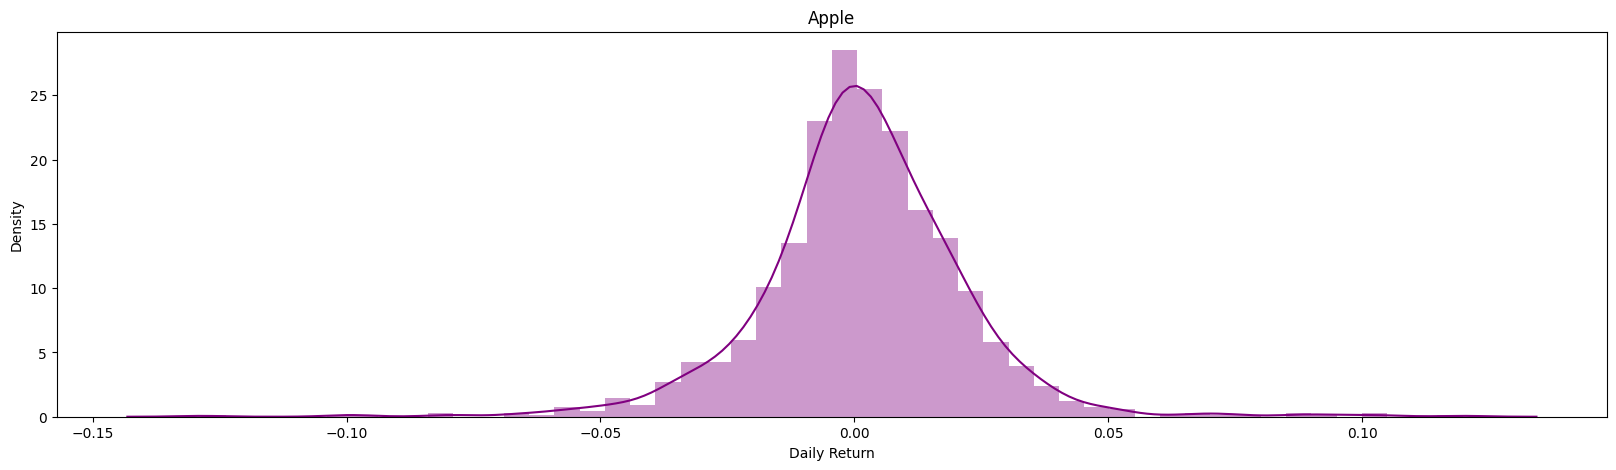

In [11]:
# An overall at the average daily return using a histogram
plot_daily_returns_distribution(company=AAPL, title='Apple')

- Most daily returns are clustered around 0.00. This means that most of the time, the price of Apple stock did not change much from day to day.
- There are some days with significant positive and negative returns. This means that there were some days when the price of Apple stock increased or decreased by a significant amount.
- The distribution is slightly skewed to the right. This means that there were slightly more days with negative returns than days with positive returns.

In [12]:
# The kurtosis value is a measure of the curvature of data distribution. 
# It measures the concentration of data around its average, as well as the curvature of the vertex of the distribution
print_kurtosis_value(company=AAPL, title='Apple')

Kurtosis Value for Apple: 5.256400931446563


The positive kurtosis value indicate that the distribution of Apple's daily profit rate has a higher peak than the standard distribution (Gaussian distribution). 

How much value do we put at risk by investing in a paticular stock ?

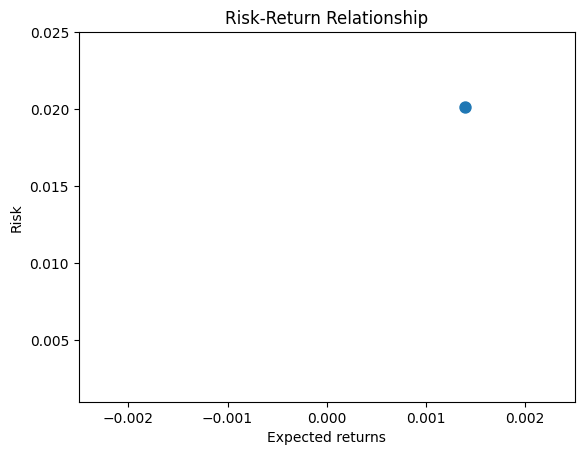

In [13]:
# Using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.
plot_risk_return(returns_df=AAPL, companies_title=["AAPL"])

Dickey-Fuller Method to check stationary and seasonality

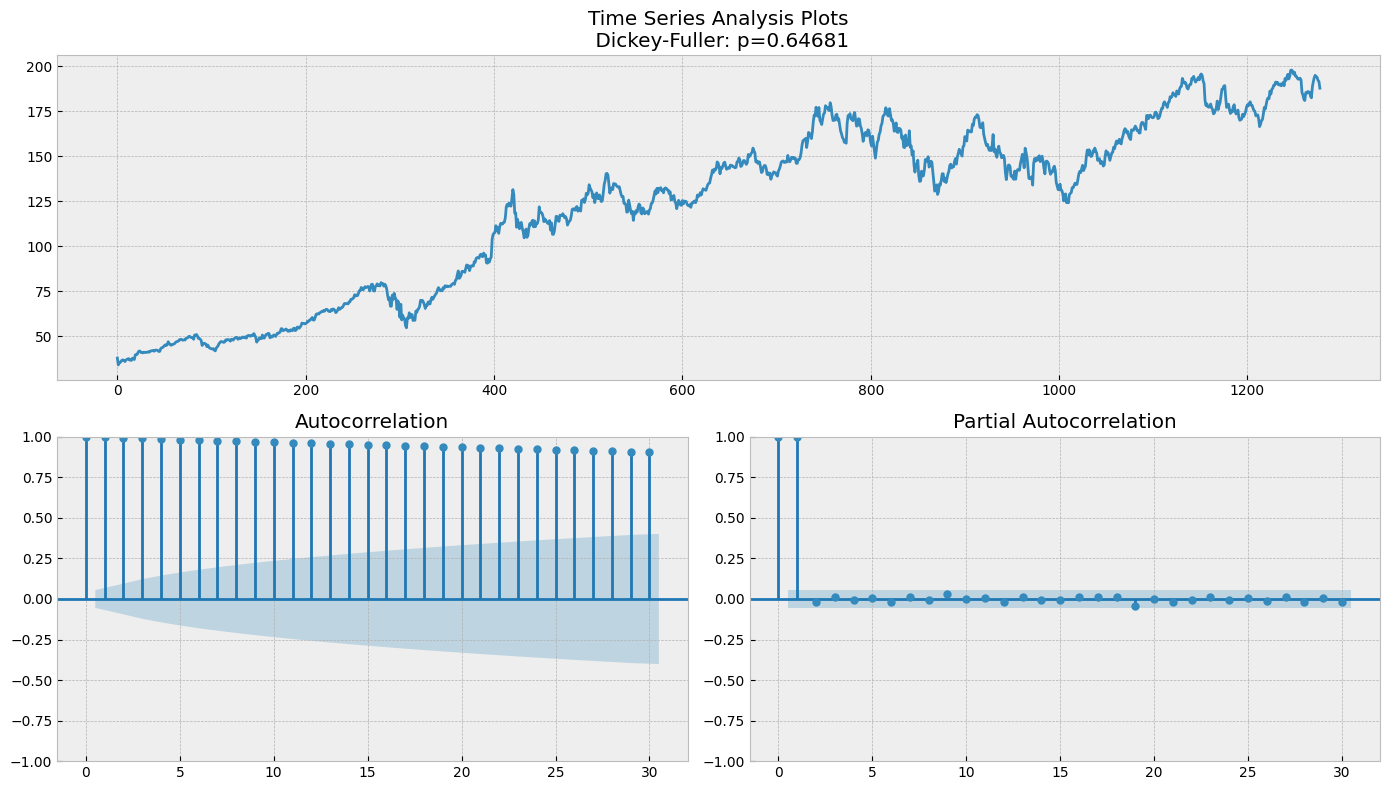

In [14]:
tsplot(AAPL["Adj Close"], lags=30)